In [40]:
import json
import os.path
import sqlite3

import numpy as np
from matplotlib import pyplot as plt

In [41]:
# TABLE prior_noise_sensitivity_experiment(prior_val, std, img_index, start_time, end_time)

In [42]:
mat_version = 10
mat_params_path = f'results/prior_noise_sensitivity_experiment/custom_material_prior/version_{mat_version}/params.json'
with open(mat_params_path, 'r') as fp:
        mat_params_dict = json.load(fp)
mat_value_db_path = os.path.join(mat_params_dict['result_dir'], 'values.db')
mat_connection = sqlite3.connect(mat_value_db_path)
mat_cursor = mat_connection.cursor()

In [43]:
mat_cursor.execute("SELECT mean, std from variance_data")
mat_means, std = zip(*mat_cursor.fetchall())

In [44]:
but_version = 3
but_params_path = f'results/prior_noise_sensitivity_experiment/custom_butterfly_prior/version_{but_version}/params.json'
with open(but_params_path, 'r') as fp:
        but_params_dict = json.load(fp)
but_value_db_path = os.path.join(but_params_dict['result_dir'], 'values.db')
but_connection = sqlite3.connect(but_value_db_path)
but_cursor = but_connection.cursor()

In [45]:
but_cursor.execute("SELECT mean, std from variance_data")
but_means, std = zip(*but_cursor.fetchall())

In [46]:
#TABLE flow_model_train_loss(step, loss)
version = 3
loss_db_path = f'results/patch_nr/custom_patch_nr/version_{version}/loss.db'
connection = sqlite3.connect(loss_db_path)
cursor = connection.cursor()
cursor.execute('SELECT * from flow_model_validation_loss')
val_step, val_loss =zip(*cursor.fetchall())
np.mean(val_loss)

-133.11626740519205

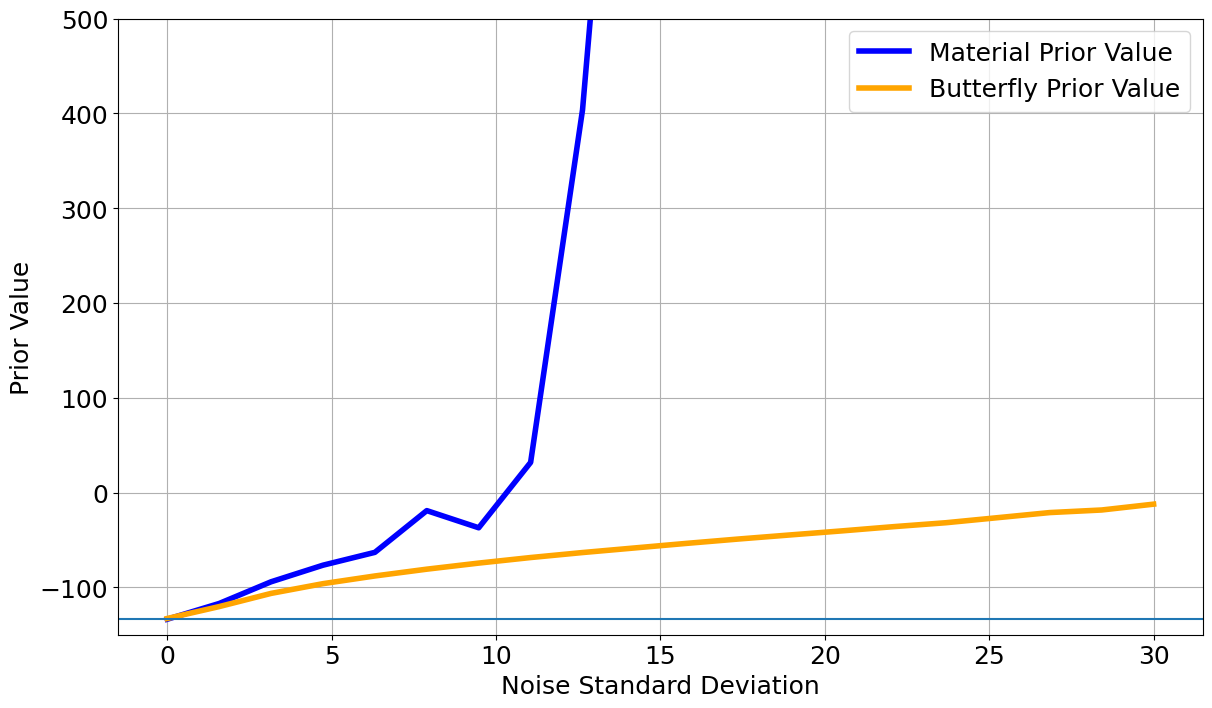

In [47]:
plt.rcParams.update({'font.size' : 18})
plt.figure(figsize=(14, 8))
plt.plot(std, mat_means, label='Material Prior Value', linestyle='-', linewidth=4, color='blue')
plt.plot(std, but_means, label='Butterfly Prior Value', linestyle='-', linewidth=4, color='orange')
plt.axhline(np.mean(val_loss))
plt.xlabel('Noise Standard Deviation')
plt.ylabel('Prior Value')
ax = plt.gca()
ax.set_ylim([-150, 500])
#plt.title('Prior value behavior for increasing blurr std')
plt.grid(True)
plt.legend()
plt.show()